# Let's analyze some data!

In [2]:
# import externally defined functions
%run ./functions/LoadPampusData.ipynb
%run ./models/BaseCaseLastWeek.ipynb
%run ./functions/test_stationarity.ipynb

In [3]:
# import packages
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt #gives error the first time, just try again# Show all cell outputs:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [4]:
# load data
file = '../data/HISTORY15MINS.csv'
data = LoadPampusData(file)

In [19]:
# subset data to single timeseries (ts)
seriesname = 'LOAD_1_TOTW_1'
ts = data[seriesname]
# first, let's only examine all data, up until 2016-12-23 after which there are only 0 values
ts1 = data[seriesname][:'2016-12-23']

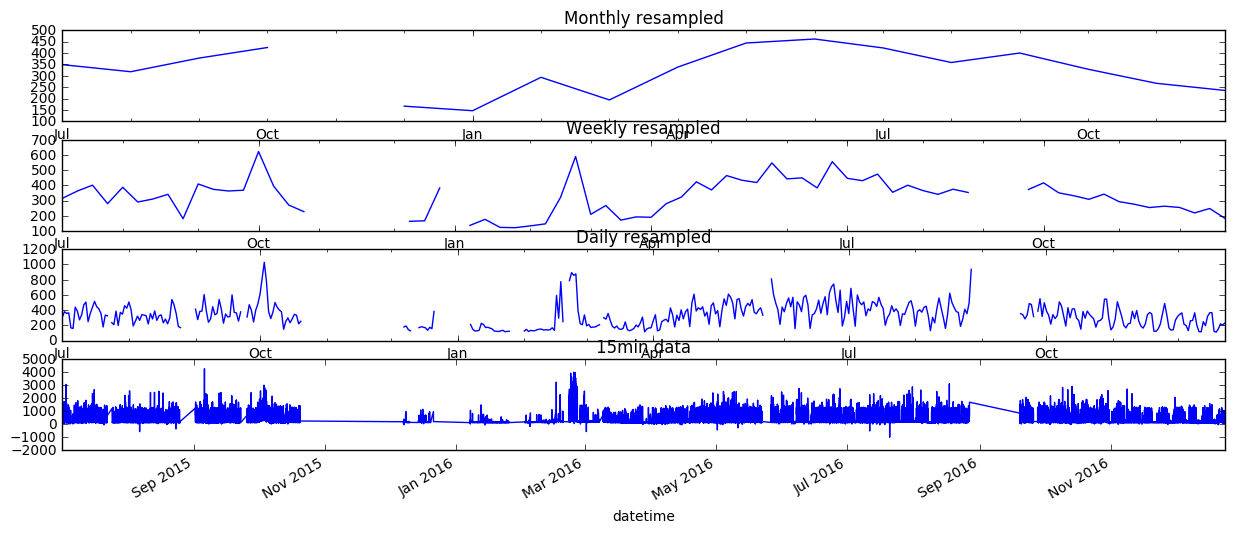

In [20]:
plt.subplot(4,1,1);
ts1.resample("M").mean().plot();
plt.title("Monthly resampled");
plt.subplot(4,1,2);
ts1.resample("W").mean().plot();
plt.title("Weekly resampled");
plt.subplot(4,1,3);
ts1.resample("D").mean().plot();
plt.title("Daily resampled");
plt.subplot(4,1,4);
ts1.plot();
plt.title("15min data");
plt.subplots_adjust(hspace=0.2);

We notice a large datagap between okt-2015 and jan 2016. So let's omit this data

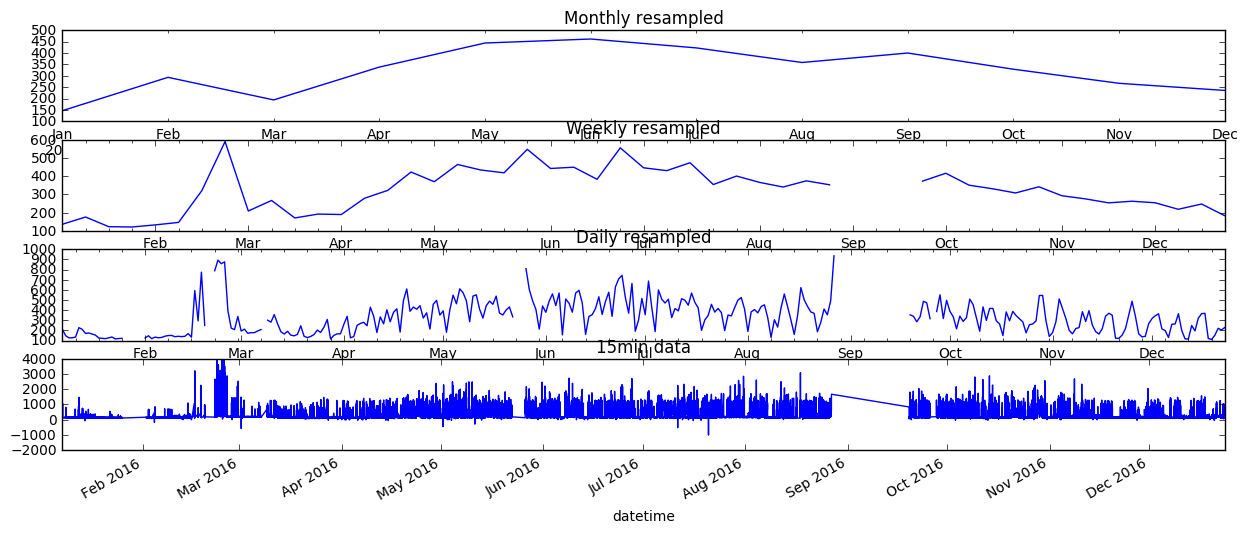

In [21]:
ts2 = data[seriesname]['2016-01-01':'2016-12-23']
plt.subplot(4,1,1);
ts2.resample("M").mean().plot();
plt.title("Monthly resampled");
plt.subplot(4,1,2);
ts2.resample("W").mean().plot();
plt.title("Weekly resampled");
plt.subplot(4,1,3);
ts2.resample("D").mean().plot();
plt.title("Daily resampled");
plt.subplot(4,1,4);
ts2.plot();
plt.title("15min data");
plt.subplots_adjust(hspace=0.2);

We observe a strong yearly trend, and weekly pattern becomes visible when we sample per day.

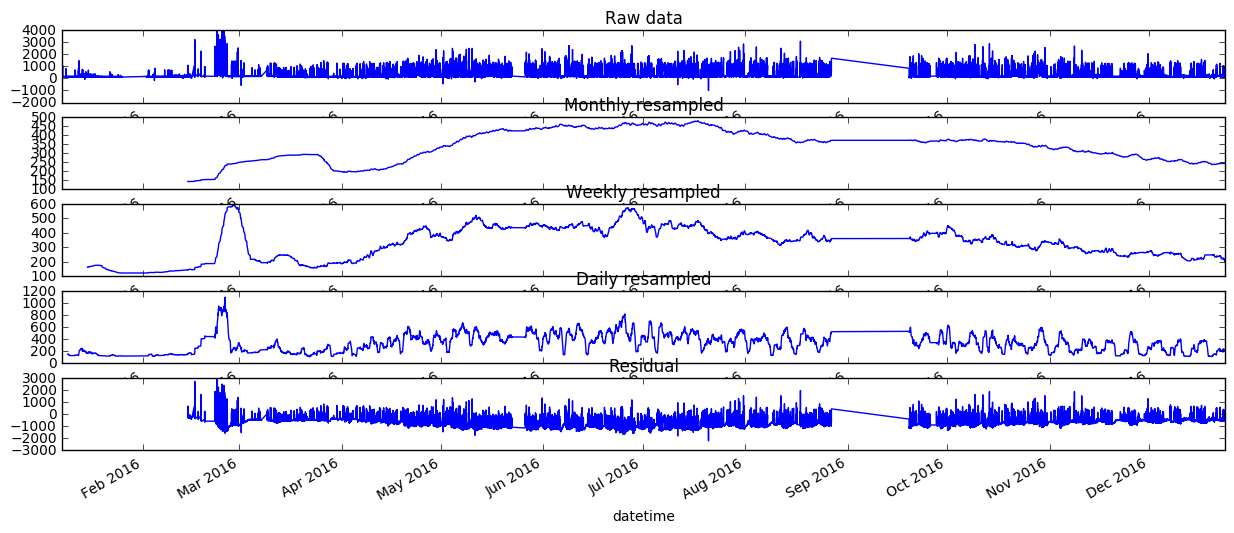

In [22]:
# try manually decompose:
monthly = ts2.rolling(window = 96 * 30).mean()
weekly = ts2.rolling(window = 96 * 7).mean()
daily = ts2.rolling(window = 96).mean()
residual = ts2 - monthly - weekly - daily

plt.subplot(5,1,1);
ts2.plot()
plt.title("Raw data");
plt.subplot(5,1,2);
monthly.plot()
plt.title("Monthly resampled");
plt.subplot(5,1,3);
weekly.plot()
plt.title("Weekly resampled");
plt.subplot(5,1,4);
daily.plot()
plt.title("Daily resampled");
plt.subplot(5,1,5);
residual.plot()
plt.title("Residual");

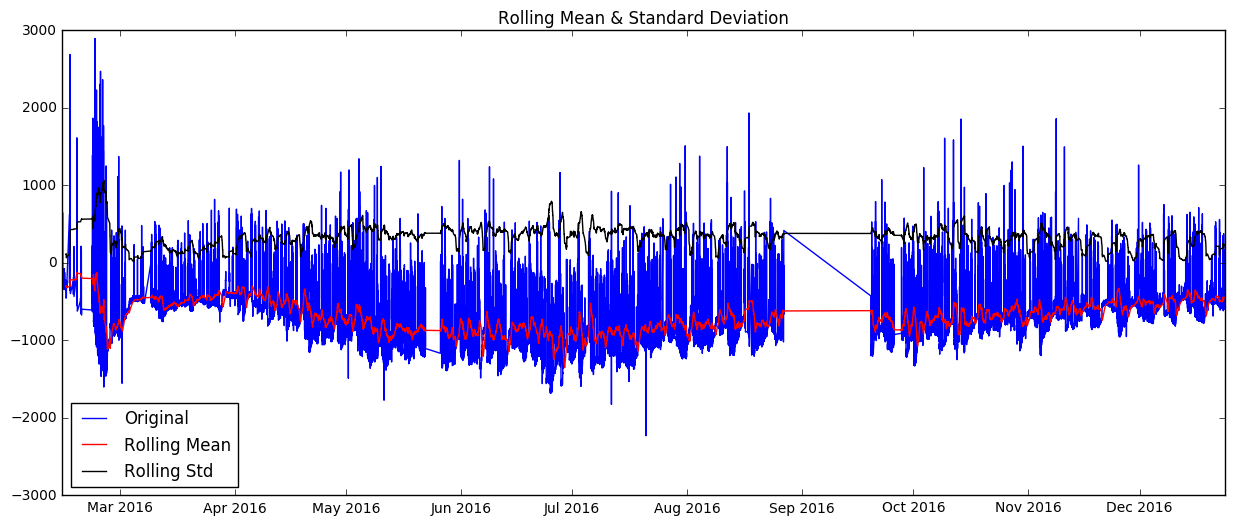

Results of Dickey-Fuller Test:
Test Statistic                   -20.956016
p-value                            0.000000
#Lags Used                        29.000000
Number of Observations Used    26125.000000
Critical Value (5%)               -2.861651
Critical Value (1%)               -3.430600
Critical Value (10%)              -2.566829
dtype: float64


In [23]:
test_stationarity(residual[30*96:])

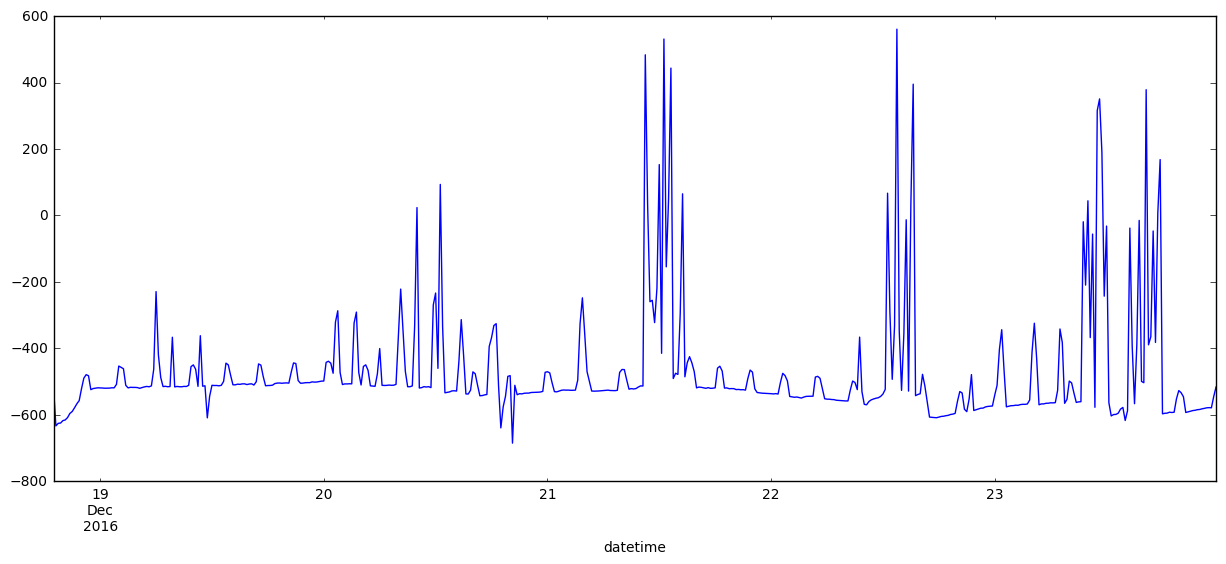

In [25]:
residual[-500:].plot();